- <b>Problem statement</b>
Predict compression strength of the cement concrete. Compression strength determines the strength of the cement to compress under heavy load. This is an important factor to decide on the quality of the cement concrete in the cement manufacturing industry.
This is a regression problem because the strength is a continuous variable. This is not a classification problem.

- <b> Dataset </b>
https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

In [307]:
#pip install xgboost

     |████████████████████████████████| 1.2 MB 5.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [387]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

In [388]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [389]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [390]:
# Load the dataset
cement_data = pd.read_csv('compresive_strength_concrete.csv')

In [391]:
cement_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.00,0.00,0.00,162.00,2.50,"1,040.00",676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,"1,055.00",676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


<b> Observations: </b> There are total 8 independent variables (also called as predictors or regressors) and 1 dependant variable (also called as target variables or response variables). All the records are numeric.

In [392]:
# get the exact column names
cement_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [393]:
# rename the variables
cement_data = cement_data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
                                          'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"slag",
                                          'Fly Ash (component 3)(kg in a m^3 mixture)':"ash",
                                          'Water  (component 4)(kg in a m^3 mixture)':"water",
                                          'Superplasticizer (component 5)(kg in a m^3 mixture)':"superplasticizer",
                                          'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarseagg",
                                          'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fineagg",
                                          'Age (day)':'age',
                                          'Concrete compressive strength(MPa, megapascals) ':"strength"
                                         })

In [394]:
cement_data.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.00,0.00,0.00,162.00,2.50,"1,040.00",676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,"1,055.00",676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


In [395]:
# get the details of the data
cement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   ash               1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseagg         1030 non-null   float64
 6   fineagg           1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [396]:
# check if any null values in the dataset. 
# We do not need to chec for '?' or anythin sort of those as all the values are numeric
cement_data.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
strength            0
dtype: int64

In [397]:
# Univariate analysis
cement_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplasticizer,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [398]:
# Check if the data is positively of negatively skewed
# Positive skew/right skewed :the tail is on the right side, mode < median
# Negative skew/left skewed: the tail on the left side, mode > median
# Any value less than or greater than zero indicates non-normality in the data
# skew value greater than zero indicates positive/right skewness
from scipy.stats import skew
for col in cement_data.columns:
    skewness = skew(cement_data[col])
    if skewness>0:
        print(f'\033[1m{col}\033[0m is positively/right skewed')
    elif skewness<0:
        print(f'\033[1m{col}\033[0m is negatively/left skewed')
    elif skewness==0:
        print(f'\033[1m{col}\033[0m is NOT skewed')

cement is positively/right skewed
slag is positively/right skewed
ash is positively/right skewed
water is positively/right skewed
superplasticizer is positively/right skewed
coarseagg is negatively/left skewed
fineagg is negatively/left skewed
age is positively/right skewed
strength is positively/right skewed


### Exploratory data analysis

#### Outlier detection

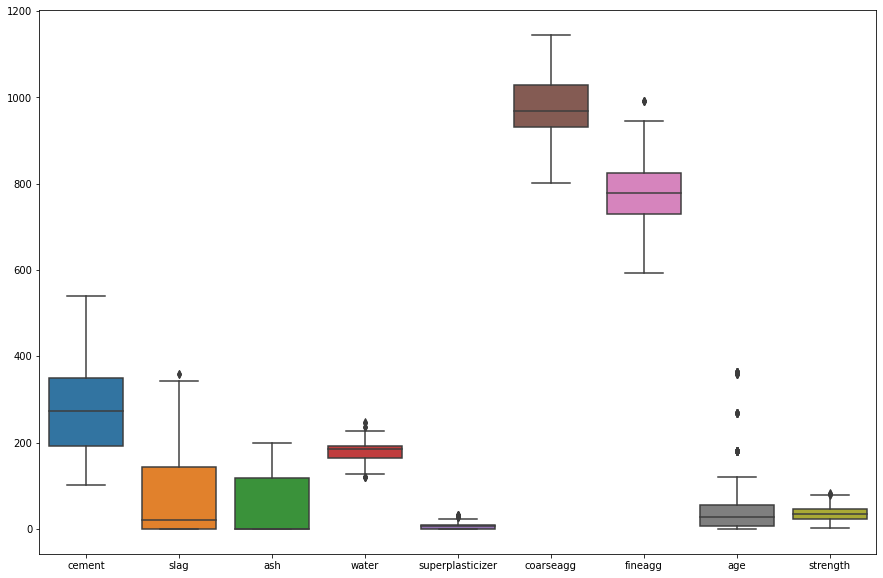

In [399]:
# check for the outliers using the boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=cement_data);

In [400]:
from scipy import stats

In [401]:
def outlier_detection(feature):
    Q1=cement_data[feature].quantile(q=0.25)
    Q3=cement_data[feature].quantile(q=0.75)
    print(f'1st Quartile (Q1) for {feature}: ', Q1)
    print(f'3rd Quartile (Q3) for {feature}: ', Q3)
    print(f'Interquartile range (IQR) for {feature}: ', stats.iqr(cement_data[feature]))
    
    # Compute the Outlier detection for outlier limit from IQR, anything 1.5 times the IQR(Q3-Q1) 
    lower_outliers = Q1 - 1.5*(Q3-Q1)
    upper_outliers = Q3 + 1.5*(Q3-Q1)
    print(f'Lower outliers for {feature}:', lower_outliers)
    print(f'Upper outliers for {feature}:', upper_outliers)
    
    # check for the presence of outliers with the upper and lower limits
    print(f'Number of outliers in {feature} below lower quartile:', cement_data[cement_data[feature]<lower_outliers][feature].count())
    print(f'Number of outliers in {feature} above upper quartile:', cement_data[cement_data[feature]>upper_outliers][feature].count())

In [402]:
### Outlier detection for CEMENT
outlier_detection(feature='cement')

1st Quartile (Q1) for cement:  192.375
3rd Quartile (Q3) for cement:  350.0
Interquartile range (IQR) for cement:  157.625
Lower outliers for cement: -44.0625
Upper outliers for cement: 586.4375
Number of outliers in cement below lower quartile: 0
Number of outliers in cement above upper quartile: 0


In [403]:
### Outlier detection for WATER
outlier_detection(feature='water')

1st Quartile (Q1) for water:  164.9
3rd Quartile (Q3) for water:  192.0
Interquartile range (IQR) for water:  27.099999999999994
Lower outliers for water: 124.25000000000001
Upper outliers for water: 232.64999999999998
Number of outliers in water below lower quartile: 5
Number of outliers in water above upper quartile: 4


In [404]:
### Outlier detection for AGE
outlier_detection(feature='age')

1st Quartile (Q1) for age:  7.0
3rd Quartile (Q3) for age:  56.0
Interquartile range (IQR) for age:  49.0
Lower outliers for age: -66.5
Upper outliers for age: 129.5
Number of outliers in age below lower quartile: 0
Number of outliers in age above upper quartile: 59


In [405]:
### Outlier detection for SLAG
outlier_detection(feature='slag')

1st Quartile (Q1) for slag:  0.0
3rd Quartile (Q3) for slag:  142.95
Interquartile range (IQR) for slag:  142.95
Lower outliers for slag: -214.42499999999998
Upper outliers for slag: 357.375
Number of outliers in slag below lower quartile: 0
Number of outliers in slag above upper quartile: 2


In [406]:
### Outlier detection for STRENGTH
outlier_detection(feature='strength')

1st Quartile (Q1) for strength:  23.709999999999997
3rd Quartile (Q3) for strength:  46.135000000000005
Interquartile range (IQR) for strength:  22.425000000000008
Lower outliers for strength: -9.927500000000013
Upper outliers for strength: 79.77250000000001
Number of outliers in strength below lower quartile: 0
Number of outliers in strength above upper quartile: 4


In [407]:
### Outlier detection for superplasticizer
outlier_detection(feature='superplasticizer')

1st Quartile (Q1) for superplasticizer:  0.0
3rd Quartile (Q3) for superplasticizer:  10.2
Interquartile range (IQR) for superplasticizer:  10.2
Lower outliers for superplasticizer: -15.299999999999999
Upper outliers for superplasticizer: 25.5
Number of outliers in superplasticizer below lower quartile: 0
Number of outliers in superplasticizer above upper quartile: 10


In [408]:
### Outlier detection for fineagg
outlier_detection(feature='fineagg')

1st Quartile (Q1) for fineagg:  730.9499999999999
3rd Quartile (Q3) for fineagg:  824.0
Interquartile range (IQR) for fineagg:  93.05000000000007
Lower outliers for fineagg: 591.3749999999998
Upper outliers for fineagg: 963.575
Number of outliers in fineagg below lower quartile: 0
Number of outliers in fineagg above upper quartile: 5


### Multivariate analysis

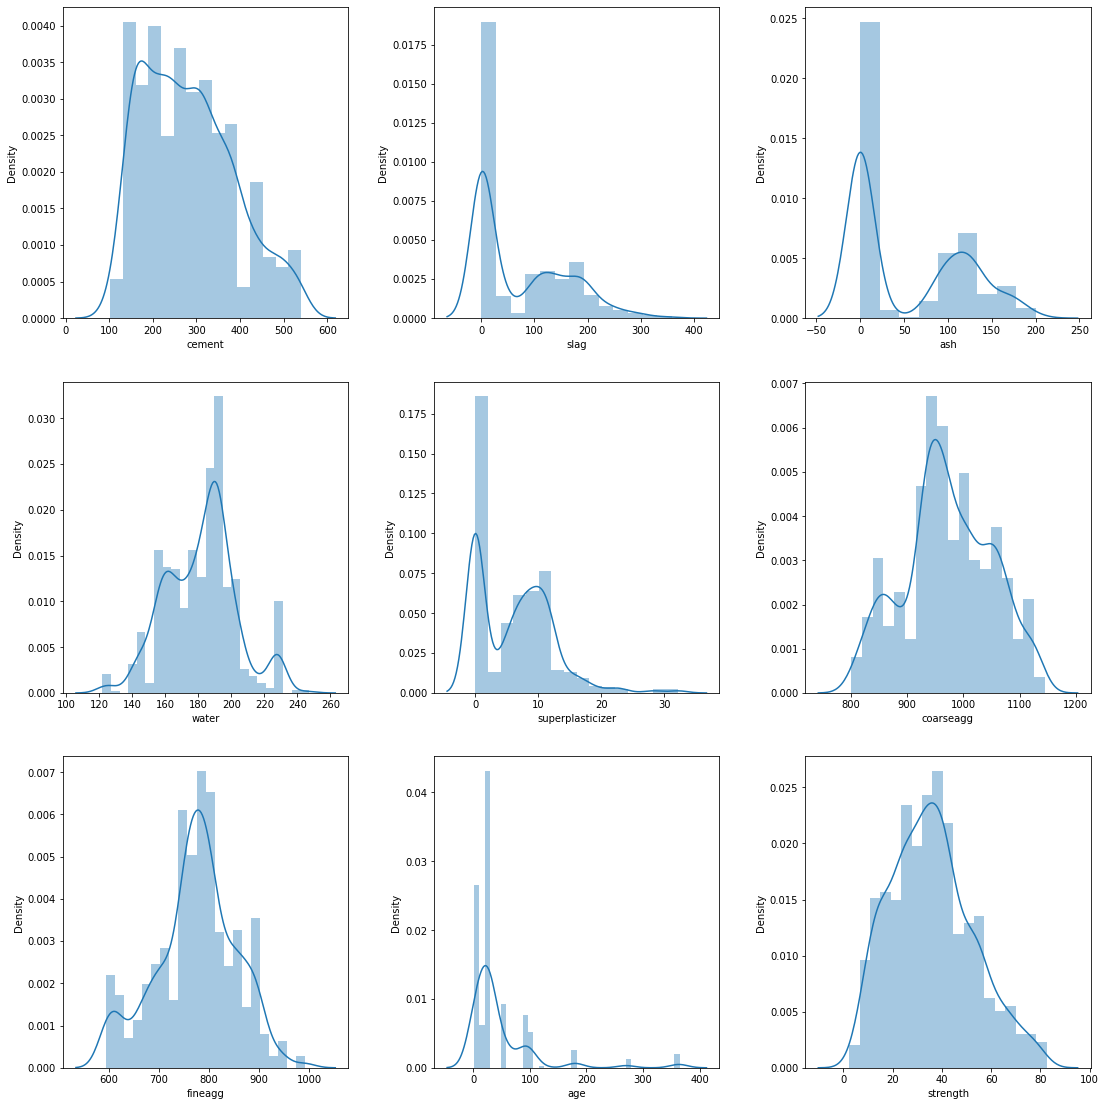

In [409]:
count=1
figure, axes = plt.subplots(3,3,figsize=(16, 16))
for i in cement_data.columns:
    plt.subplot(3,3,count)
    sns.distplot(cement_data[i])
    count+=1
figure.tight_layout(pad=3.0)

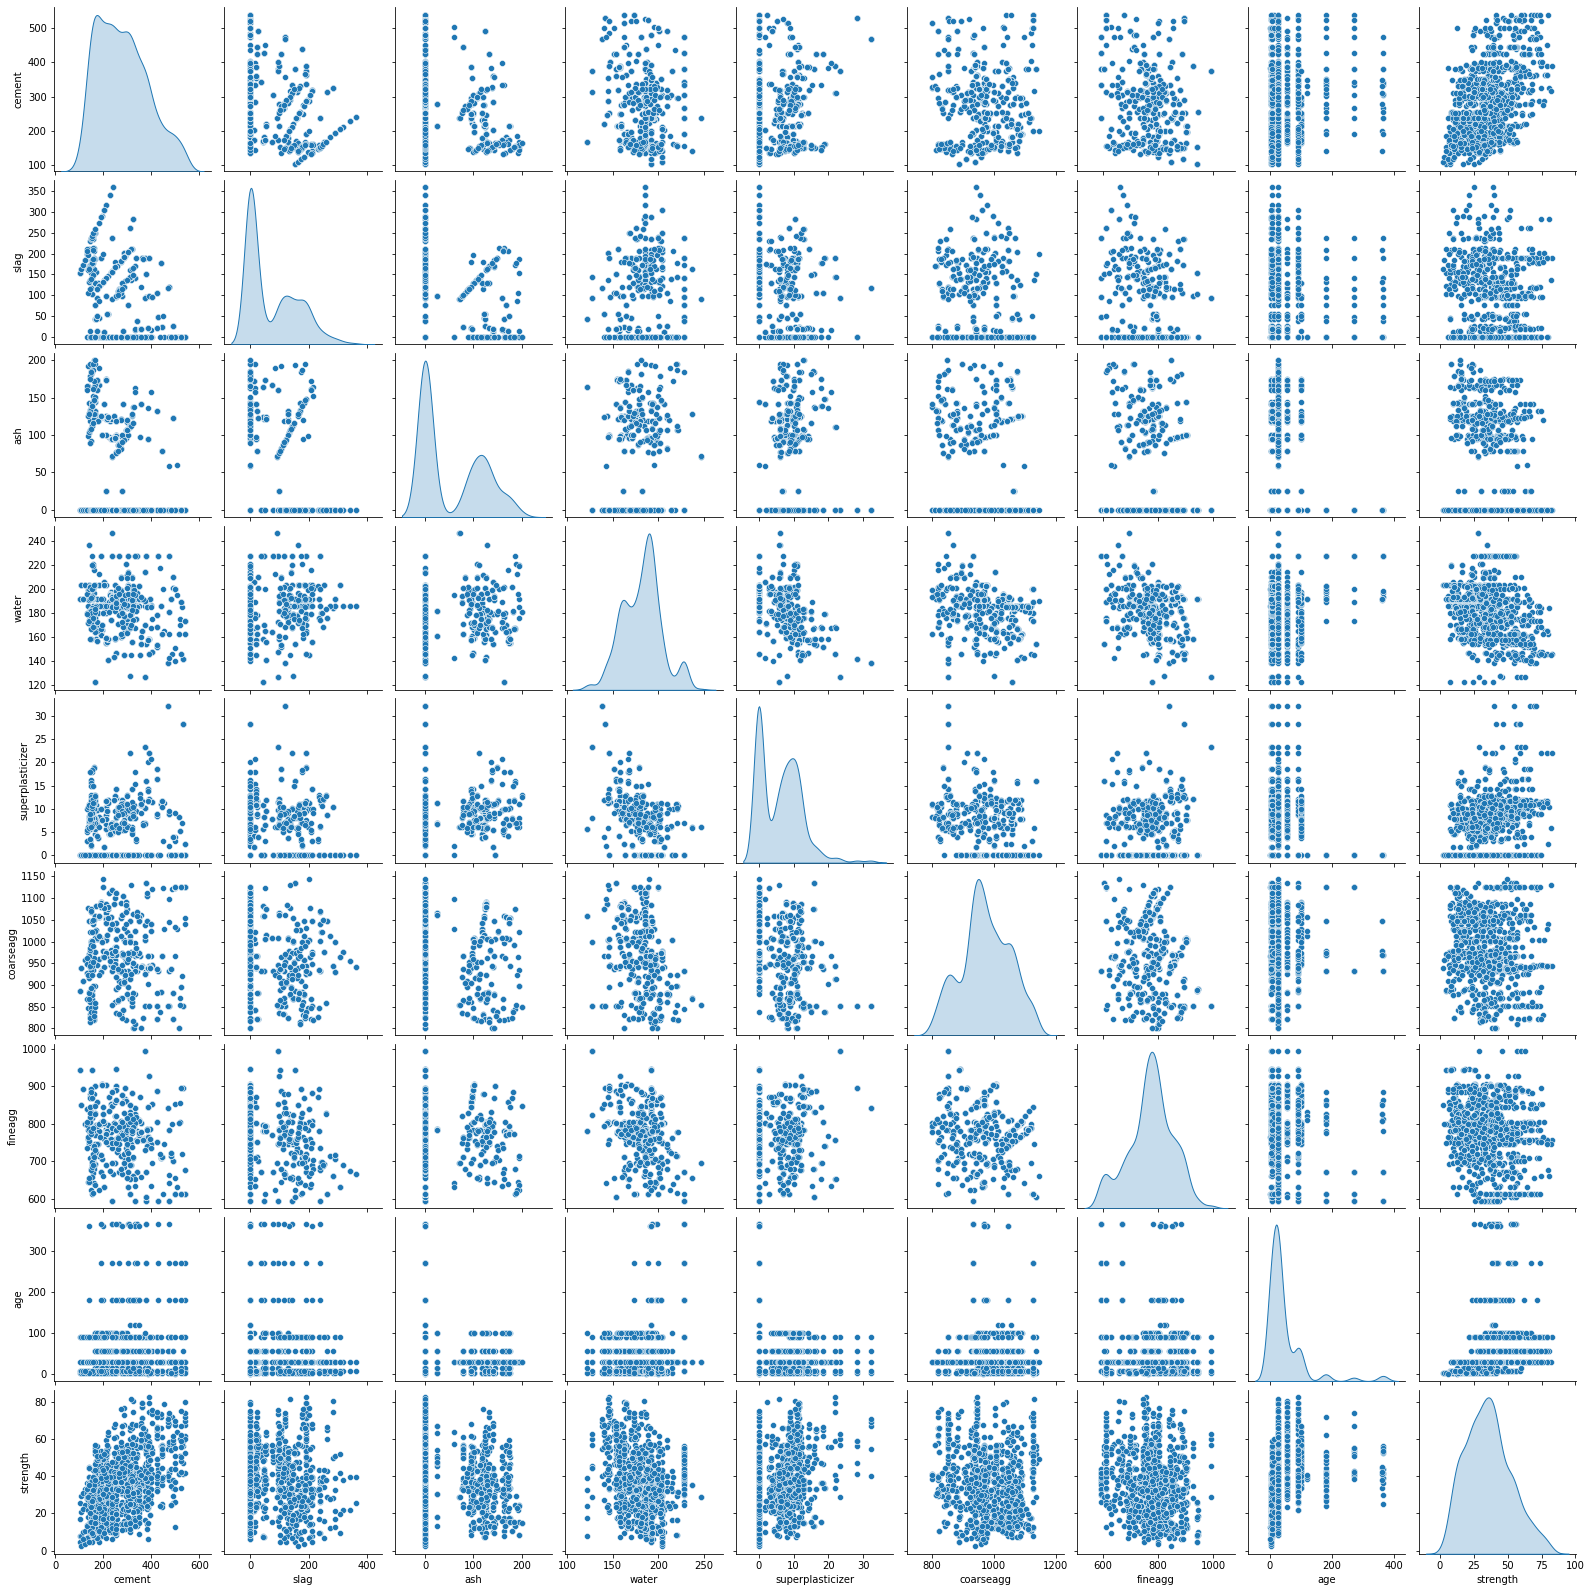

In [410]:
# Get the correlations
# using hue as stength will be LinAlg error.
# There is no point of using hue because this is not a classification problem
sns.pairplot(cement_data,diag_kind='kde');

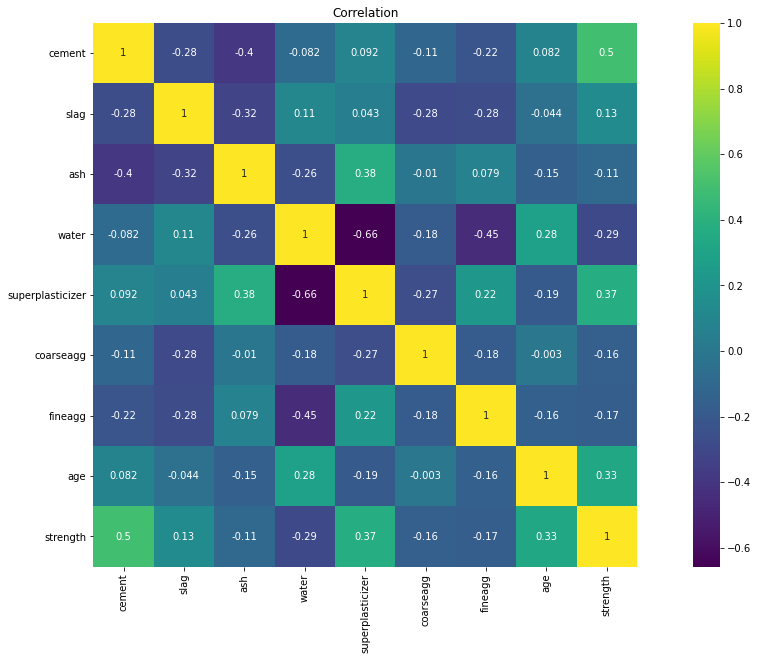

In [411]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(cement_data.corr(),vmax=1,square=True, annot=True, cmap='viridis')
plt.title('Correlation');

#### Checking for outliers using z-score

In [412]:
# if the z-score > three standard deviations, then we consider the data as an outlier
for col in cement_data.columns:
    z_score = ((cement_data[col] - cement_data[col].mean()) / cement_data[col].std()).abs()
    print(f'Number of outliers for {col}:',cement_data[z_score > 3][col].count())       

Number of outliers for cement: 0
Number of outliers for slag: 4
Number of outliers for ash: 0
Number of outliers for water: 2
Number of outliers for superplasticizer: 10
Number of outliers for coarseagg: 0
Number of outliers for fineagg: 0
Number of outliers for age: 33
Number of outliers for strength: 0


#### Replace the outliers with the median of the each respective attribute

In [413]:
for col in cement_data.columns[:-1]: # we are ofcourse ignoring the strength column, because it is the target
    Q1=cement_data[col].quantile(q=0.25)
    Q3=cement_data[col].quantile(q=0.75)
    lower_outlier_limit = Q1 - 1.5*(Q3-Q1)
    upper_outlier_limit = Q3 + 1.5*(Q3-Q1)
    
    # now replace any values which are outliers with the median of the column
    cement_data.loc[(cement_data[col] < lower_outlier_limit) | 
                    (cement_data[col] > upper_outlier_limit), col] = cement_data[col].median()

In [414]:
# AFTER REPLACING THE OUTLIER VALUES WITH MEDIAN
# if the z-score > three standard deviations, then we consider the data as an outlier
for col in cement_data.columns:
    z_score = ((cement_data[col] - cement_data[col].mean()) / cement_data[col].std()).abs()
    print(f'Number of outliers for {col}:',cement_data[z_score > 3][col].count()) 

Number of outliers for cement: 0
Number of outliers for slag: 2
Number of outliers for ash: 0
Number of outliers for water: 0
Number of outliers for superplasticizer: 5
Number of outliers for coarseagg: 0
Number of outliers for fineagg: 0
Number of outliers for age: 3
Number of outliers for strength: 0


### Feature Engineering

In [415]:
# seperate the dependant and independent variables
X = cement_data.drop('strength',axis=1)
y = cement_data['strength']

In [416]:
X_scaled = X.apply(zscore)

In [417]:
# split the independant variables into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [418]:
print('Number of training samples:', len(X_train))
print('Number of testing samples:', len(X_test))

Number of training samples: 824
Number of testing samples: 206


### Model Building

In [419]:
# Create a dataframe to store results
del results
results = pd.DataFrame(columns=['Algorithm','Train accuracy', 'Test accuracy','MSE',
                                'R2 accuracy-predicted-vs-gt', 'Mean accuracy-10-fold-train'])

In [420]:
def model_training_score(model,model_name,index):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    
    print(f'\033[1m{model_name}\033[0m')
    train_accuracy = round((model.score(X_train,y_train)),2)*100
    test_accuracy  = round((model.score(X_test,y_test)),2)*100
    print(f'Training accuracy:', train_accuracy , 'percent')
    print(f'Testing accuracy:', test_accuracy , 'percent')
    
    accuracies=cross_val_score(estimator=model,X=X_train,y=y_train,cv=20)
    
    # Metrics
    acc_r2_score = round(metrics.r2_score(y_test,y_pred),2) * 100
    mean_squared_error = round(metrics.mean_squared_error(y_test,y_pred),2)
    mean_accuracy_cross_validation = round((np.array(accuracies).mean() * 100),2)
    
    # print the metrics
    print('Mean squared error:', mean_squared_error)
    print('R2 score:', acc_r2_score)
    print('Mean Accuracy:', mean_accuracy_cross_validation)
    
    
    # store the metrices of the model in a data frame
    results.loc[index] = [model_name] + [train_accuracy] + [test_accuracy] + [mean_squared_error] +[acc_r2_score] + [mean_accuracy_cross_validation]

#### Random forest

In [421]:
model_rf = RandomForestRegressor()
model_training_score(model_rf,model_name='Random Forest',index=1)

Random Forest
Training accuracy: 98.0 percent
Testing accuracy: 89.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 29.22
R2 score: 89.0
Mean Accuracy: 89.83


#### Gradient Boosting

In [422]:
model_gb = GradientBoostingRegressor()
model_training_score(model_gb,model_name='Gradient Boosting',index=2)

Gradient Boosting
Training accuracy: 94.0 percent
Testing accuracy: 88.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 31.39
R2 score: 88.0
Mean Accuracy: 90.23


#### Ada Boosting regressor

In [423]:
model_ab = AdaBoostRegressor()
model_training_score(model_ab,model_name='Ada Boosting',index=3)

Ada Boosting
Training accuracy: 81.0 percent
Testing accuracy: 76.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 63.78
R2 score: 76.0
Mean Accuracy: 77.3


#### KNN Regressor

In [424]:
# Check for different values of neighbours to determine the best K
diff_k = []
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    diff_k.append(np.mean(pred_i != y_test))

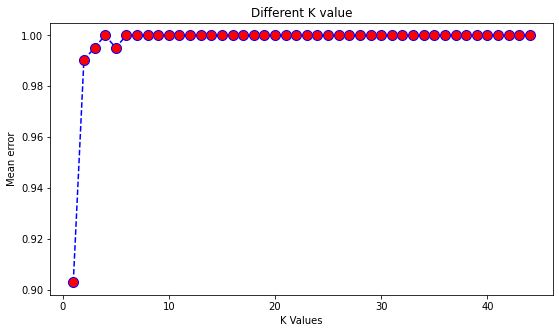

In [425]:
plt.figure(figsize=(9,5))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K value')
plt.xlabel('K Values')
plt.ylabel('Mean error');

In [426]:
model_knn = KNeighborsRegressor(n_neighbors=3,p=2)
model_training_score(model_knn,'KNN',index=4)

KNN
Training accuracy: 92.0 percent
Testing accuracy: 75.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 66.2
R2 score: 75.0
Mean Accuracy: 79.24


#### Bagging Regressor

In [427]:
model_br = BaggingRegressor()
model_training_score(model_br,'Bagging',index=5)

Bagging
Training accuracy: 98.0 percent
Testing accuracy: 88.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 30.13
R2 score: 88.0
Mean Accuracy: 88.6


#### Support Vector

In [428]:
model_svm = SVR(kernel='linear')
model_training_score(model_svm,'Support Vector Machine',index=6)

Support Vector Machine
Training accuracy: 72.0 percent
Testing accuracy: 64.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 93.53
R2 score: 64.0
Mean Accuracy: 70.42


#### XGBoost - eXtreme Gradient Boosting

In [429]:
# Sometime the import might give error, so do the installation in local machine with:  brew install libomp
import xgboost as xgb

In [430]:
from xgboost.sklearn import XGBRegressor

In [431]:
model_xgb = XGBRegressor()
model_training_score(model_xgb, ' XGBoost', index=7)

 XGBoost
Training accuracy: 99.0 percent
Testing accuracy: 90.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 25.29
R2 score: 90.0
Mean Accuracy: 91.29


#### Decision tree Regression

In [432]:
model_dcr = DecisionTreeRegressor()
model_training_score(model_dcr, 'Decision Tree', index=8)

Decision Tree
Training accuracy: 99.0 percent
Testing accuracy: 81.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 48.41
R2 score: 81.0
Mean Accuracy: 82.1


In [433]:
# Check the important features
def check_feature_imp(model):
    imp_features = pd.DataFrame(model.feature_importances_,columns=['Importance'],index=X_train.columns)
    imp_features = imp_features.sort_values('Importance',ascending=False)
    print('\033[1mImportant features are\033[0m:\n', imp_features)

In [434]:
check_feature_imp(model_dcr)

Important features are:
                   Importance
cement                  0.36
age                     0.32
water                   0.12
slag                    0.09
coarseagg               0.04
fineagg                 0.03
superplasticizer        0.02
ash                     0.01


In [435]:
# FEATURE SELECTION BASED ON THE RESULTS ABOVE

# create a copy of the dataframe
cement_data_copy = cement_data.copy()

# drop the features with less importance, here we will only keep cement, age and water, slag
X_fs = cement_data_copy.drop(['strength','coarseagg','fineagg','superplasticizer','ash'], axis=1)
y_fs = cement_data_copy['strength']

#split the data in train and test to 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_fs,y_fs, test_size=0.3,random_state=13)

# scale/normalize the training and test data
X_train = X_train.apply(zscore)
X_test  = X_test.apply(zscore)

In [436]:
model_dcr_fs = DecisionTreeRegressor()
model_training_score(model_dcr_fs,'Decision Tree/Feature selected',index=9)

Decision Tree/Feature selected
Training accuracy: 99.0 percent
Testing accuracy: 70.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 85.88
R2 score: 70.0
Mean Accuracy: 82.9


In [437]:
check_feature_imp(model_dcr_fs)

Important features are:
         Importance
cement        0.45
age           0.31
water         0.14
slag          0.10


##### Hyperparameter tuning of the Decision tree

In [438]:
# recreating the train and test set as it was overridden by the Decision tree model creation above
X = cement_data.drop('strength',axis=1)
y = cement_data['strength']
X_scaled = X.apply(zscore)
X_scaled_df = pd.DataFrame(X_scaled,columns=cement_data.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3,random_state=13)

In [439]:
model_prun_dcr = DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)

In [440]:
model_training_score(model_prun_dcr,'Pruned Decision Tree', index=10)

Pruned Decision Tree
Training accuracy: 75.0 percent
Testing accuracy: 66.0 percent


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean squared error: 95.78
R2 score: 66.0
Mean Accuracy: 68.1


In [441]:
check_feature_imp(model_prun_dcr)

Important features are:
                   Importance
cement                  0.44
age                     0.37
water                   0.12
slag                    0.04
superplasticizer        0.02
fineagg                 0.01
ash                     0.00
coarseagg               0.00


#### PLOT THE DECISION TREE

In [442]:
#pip install graphviz
#pip install pydot

In [443]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [444]:
X_scaled_df = X_scaled_df.drop('strength',axis=1)
feature_cols = X_scaled_df.columns
feature_cols

Index(['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

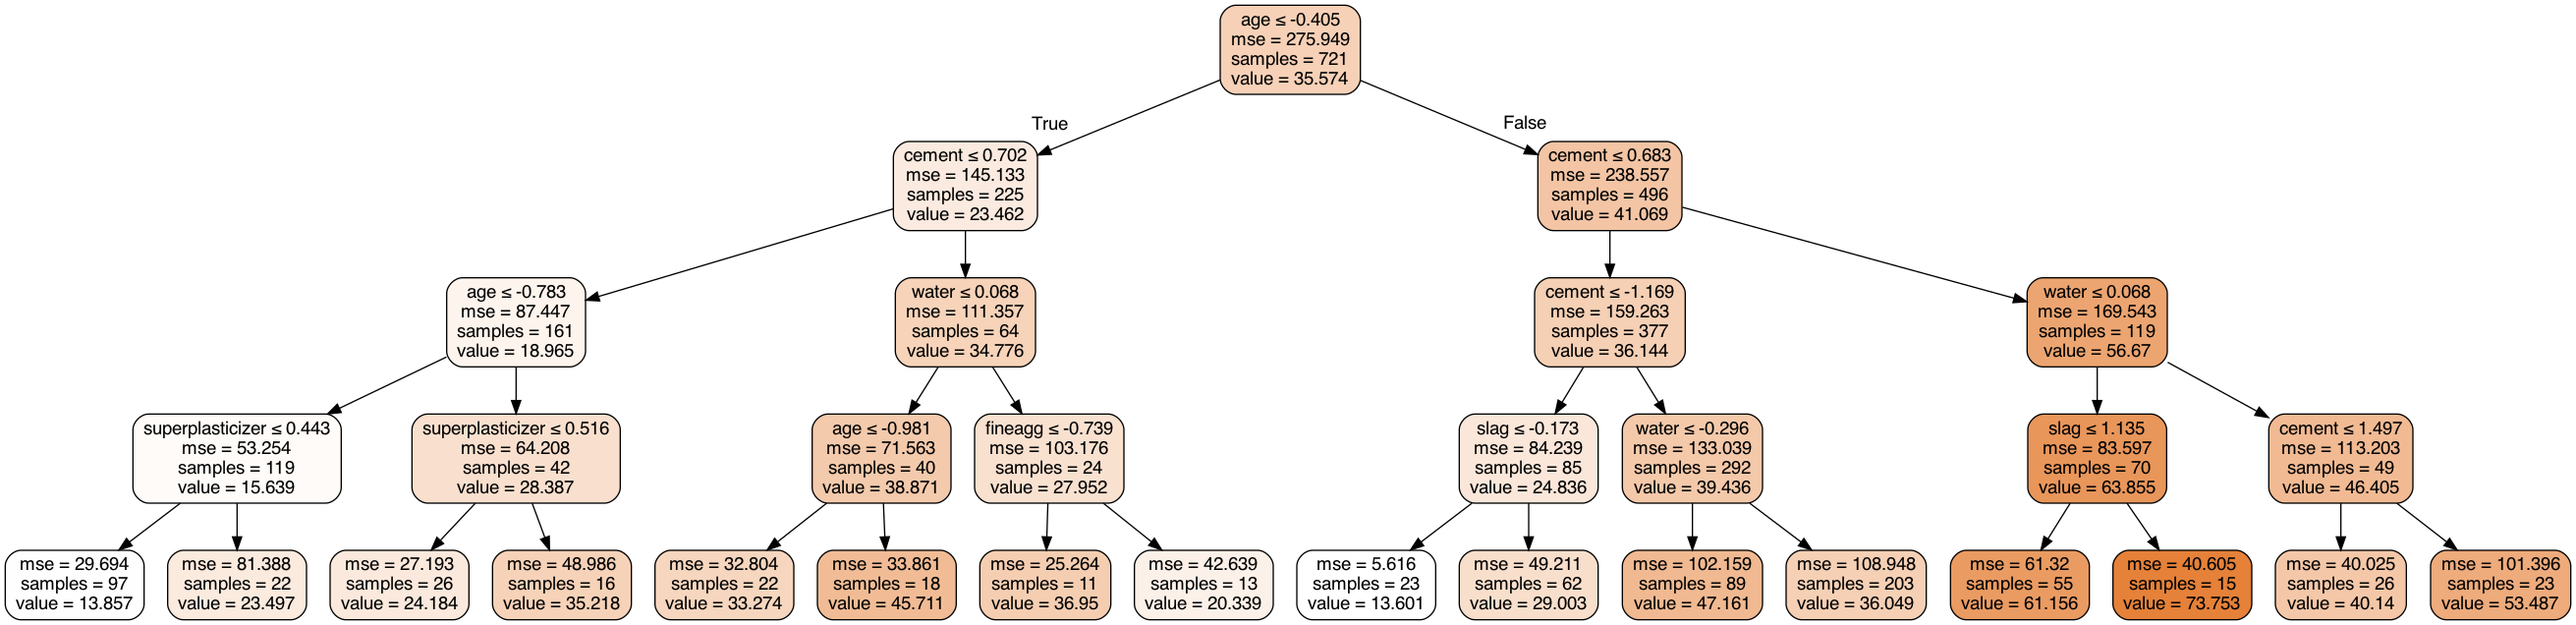

In [445]:
dot_data = StringIO()
export_graphviz(model_prun_dcr, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names=feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('pruned_decision_tree.png')
Image(graph.create_png())

### Display the accuracy of all the Algorithm

In [446]:
# sort the algorithms sorted on mean sqaured error
results.sort_values('MSE')

,Algorithm,Train accuracy,Test accuracy,MSE,R2 accuracy-predicted-vs-gt,Mean accuracy-10-fold-train
7,XGBoost,99.00,90.00,25.29,90.00,91.29
1,Random Forest,98.00,89.00,29.22,89.00,89.83
5,Bagging,98.00,88.00,30.13,88.00,88.60
2,Gradient Boosting,94.00,88.00,31.39,88.00,90.23
8,Decision Tree,99.00,81.00,48.41,81.00,82.10
3,Ada Boosting,81.00,76.00,63.78,76.00,77.30
4,KNN,92.00,75.00,66.20,75.00,79.24
9,Decision Tree/Feature selected,99.00,70.00,85.88,70.00,82.90
6,Support Vector Machine,72.00,64.00,93.53,64.00,70.42
10,Pruned Decision Tree,75.00,66.00,95.78,66.00,68.10


In [448]:
#results.style.set_properties(**{'text-align': 'center'})